In [99]:
from gaia.utils.monitoring import BaseMonitoring, RegularMonitoring, PeriodicMonitoring
from codecarbon import EmissionsTracker
import os
import pandas as pd
from time import sleep
from codecarbon.output import EmissionsData

In [100]:
host_name: str = os.uname()[1]
host_name

'Christians-MacBook-Pro.local'

In [101]:
# rm = RegularMonitoring(measure_power_secs=10)

# pm = PeriodicMonitoring(measure_power_secs=0.5)

```bash
for run in {1..5}; do
  ffmpeg -y -re -i Beauty_s000.265 -b:v:0 1000k -b:v:0 1000k -minrate 1000k -maxrate 1000k -bufsize 3000k -c:v:0 libx264 -filter:v:0 "scale=200:100 ,fps=10" -preset medium -keyint_min 10 -g 10 test.mp4
done
```

In [102]:
def start_measuring(measurement_interval: float, repetitions: int = 10, sleep_time: float = 0) -> list[EmissionsData]:
    tracker = EmissionsTracker(
        measure_power_secs=measurement_interval, 
        project_name='test test', 
        log_level='error',
        output_file=f'emissions_{host_name}.csv')
    pm = PeriodicMonitoring(tracker=tracker)

    if sleep_time == 0:
    
        for i in range(repetitions):
            pm.tracker._project_name = f'Beauty_s000_{measurement_interval}s_{(i + 1)}_{host_name}'
            
            # os.system('ffmpeg -y -re -i Beauty_s000.265 -b:v:0 1000k -b:v:0 1000k -minrate 1000k -maxrate 1000k -bufsize 3000k -c:v:0 libx264 -filter:v:0 "scale=200:100 ,fps=10" -preset medium -keyint_min 10 -g 10 test.mp4')
            pm.scheduler.start()
            pm.start_monitoring('ffmpeg -hide_banner -loglevel error -y -re -i Beauty_s000.265 -b:v:0 1000k -b:v:0 1000k -minrate 1000k -maxrate 1000k -bufsize 3000k -c:v:0 libx264 -filter:v:0 "scale=200:100 ,fps=10" -preset medium -keyint_min 10 -g 10 test.mp4')
            pm.scheduler.stop()
            # sleep(0.2)
    
    else:
        for i in range(repetitions):
            tracker._project_name = f'sleep_{measurement_interval}s_{(i + 1)}_{host_name}'
            # tracker.start()
            os.system(f'sleep {sleep_time}')
            # tracker.stop()
            # sleep(0.2)

    pm.tracker.stop()
    pm.scheduler.stop()
    return pm.collected_data


In [103]:
step: float = 0.25

intervals: list[float] = [0.125] + [step * x for x in range(1, 13)]
last_val = intervals[-1]
# intervals.extend([1 * x + last_val for x in range(1, 18)])
intervals

[0.125, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]

In [104]:
collected_measurements: list[EmissionsData] = []

# for i in intervals[:2]:
#     collected_measurements.extend(start_measuring(i, 2))
collected_measurements.extend(start_measuring(0.5, 3))

[codecarbon INFO @ 16:57:14] [setup] RAM Tracking...
[codecarbon INFO @ 16:57:14] [setup] GPU Tracking...
[codecarbon INFO @ 16:57:14] No GPU found.
[codecarbon INFO @ 16:57:14] [setup] CPU Tracking...
[codecarbon WARNING @ 16:57:14] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:57:14] CPU Model on constant consumption mode: Apple M1 Max
[codecarbon INFO @ 16:57:14] >>> Tracker's metadata:
[codecarbon INFO @ 16:57:14]   Platform system: macOS-14.2.1-arm64-arm-64bit
[codecarbon INFO @ 16:57:14]   Python version: 3.10.13
[codecarbon INFO @ 16:57:14]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 16:57:14]   Available RAM : 32.000 GB
[codecarbon INFO @ 16:57:14]   CPU count: 10
[codecarbon INFO @ 16:57:14]   CPU model: Apple M1 Max
[codecarbon INFO @ 16:57:14]   GPU count: None
[codecarbon INFO @ 16:57:14]   GPU model: None
[codecarbon INFO @ 16:57:17] Energy consumed for RAM : 0.000003 kWh. RAM Power : 12.0 W
[codecarbon INFO @ 16:57:17] Energy cons

In [105]:
collected_measurements

[MonitoringData(timestamp='2024-03-06T16:57:17', project_name='Beauty_s000_0.5s_1_Christians-MacBook-Pro.local', run_id='44f3d20e-4a5d-4114-9033-d9e7d4c8329e', duration=1.0066430568695068, emissions=3.05106131421725e-07, emissions_rate=3.03092669580968e-07, cpu_power=5.0, gpu_power=0.0, ram_power=12.0, cpu_energy=1.3995263311598038e-06, gpu_energy=0, ram_energy=3.352593580881755e-06, energy_consumed=4.752119912041559e-06, country_name='Austria', country_iso_code='AUT', region='vienna', cloud_provider='', cloud_region='', os='macOS-14.2.1-arm64-arm-64bit', python_version='3.10.13', codecarbon_version='2.2.2', cpu_count=10, cpu_model='Apple M1 Max', gpu_count=None, gpu_model=None, longitude=16.3944, latitude=48.217, ram_total_size=32.0, tracking_mode='machine', on_cloud='N'),
 MonitoringData(timestamp='2024-03-06T16:57:18', project_name='Beauty_s000_0.5s_1_Christians-MacBook-Pro.local', run_id='44f3d20e-4a5d-4114-9033-d9e7d4c8329e', duration=0.9999091625213623, emissions=1.27365293293529

In [106]:
len(collected_measurements)

22

In [112]:
df = pd.DataFrame(collected_measurements)

In [114]:
df['emissions_rate_norm'] = df['emissions_rate'] / df['emissions_rate'].max()

<Axes: >

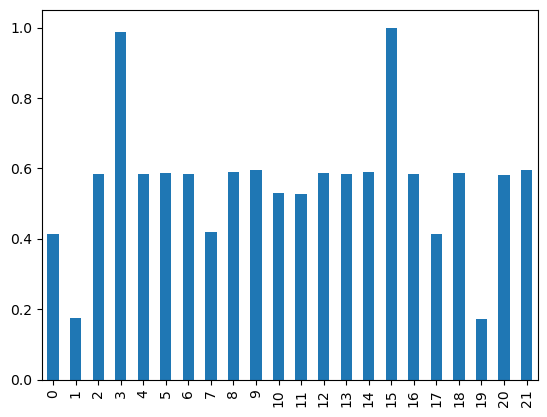

In [117]:
df['emissions_rate_norm'].plot.bar()

In [108]:
# for i in range(10):
#     tracker._project_name = f'Beauty_s000_{measurement_interval}s_{i}'
#     tracker.start()
#     os.system('ffmpeg -y -re -i Beauty_s000.265 -b:v:0 1000k -b:v:0 1000k -minrate 1000k -maxrate 1000k -bufsize 3000k -c:v:0 libx264 -filter:v:0 "scale=200:100 ,fps=10" -preset medium -keyint_min 10 -g 10 test.mp4')
#     tracker.stop()
#     sleep(0.2)
    

# for i in range(10):
#     tracker._project_name = f'sleep_{measurement_interval}s_{i}'
#     tracker.start()
#     os.system('sleep 3')
#     tracker.stop()
#     sleep(0.2)

In [109]:
# for i in range(12):
#     rm.start_monitoring('sleep 2')

# # rm.tracker.stop()
# rm.tracker.stop()

# rm.collected_data

In [110]:
# for i in rm.collected_data:
#     print(type(i))